# Lab 1 Report

Jared Yen, Khoa Tran, Stefan Smigoc, Jan Silva


In [6]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy.io import wavfile as wav

# import whatever other modules you use in this lab

# The commands you use to make your modules usable also go in this cell.

## Summary

In this lab, we practice basic Python operations, create arrays to represent sound files, and then learn how to manipulate those arrays using Python operations. We also learn how to plot signals and read and write sound files. 

## Assignment 1 -- Creating and Manipulating Arrays 

In [7]:
# Assignment 1 - Creating and Manipulating Arrays 

# Here you'd put in your code for Assignment 1, organized by parts if necessary
# For example:

# Part A
# TODO: Code that solves A
y1 = np.array([4,6,2])

# Part B
# TODO: Code that solves B
ca = y1[1]
cb = y1[1:]
d = len(y1)
print(ca)
print(cb)
print(d)

# Part C
# TODO: Code that solves C
x1 = 2 * np.ones(5)
x2 = np.arange(-2,3,1)
print(x1)
print(x2)

# Part D
# TODO: Code that solves D
arrp = x1 + x2
arrc = np.concatenate([x1, x2])
print(arrp)
print(arrc)


6
[6 2]
3
[2. 2. 2. 2. 2.]
[-2 -1  0  1  2]
[0. 1. 2. 3. 4.]
[ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


###  Discussion

Addition of two vectors is addition of each individual elements, while concatenation combines the elements of the two arrays into one longer array.


## Assignment 2 -- Amplitude Operations on Signals


In [8]:
# Assignment 2 - Amplitude Operations on Signals

# Here you'd put in your code for Assignment 2

# Part A
# TODO: Code that solves A
fs = 2
t = np.arange(0,3.5,1/fs)
x = 0.5 * t
y = t ** 2
print(x)
print(y)


# Part B
# TODO: Code that solves B

z = x - (2*y)
print(z)

# Part C
# TODO: Code that solves C
nt = int(2*fs)
w1 = z[nt]
print(w1)

# Part D
# TODO: Code that solves D
nstart = int(0*fs)
n2 = int(1.5*fs)
w2 = z[nstart:n2 + 1]
print(w2)


[0.   0.25 0.5  0.75 1.   1.25 1.5 ]
[0.   0.25 1.   2.25 4.   6.25 9.  ]
[  0.    -0.25  -1.5   -3.75  -7.   -11.25 -16.5 ]
-7.0
[ 0.   -0.25 -1.5  -3.75]


###  Discussion

If we used fs = 1 instead of fs = 2, we would have less elements in the array and the values would be different (whole numbers).


## Assignment 3 -- Working with Sound Files

In [14]:
# Assignment 3 - Working with Sound Files

# Part A
# TODO: Code that solves A
fs1, y1 = wav.read('train32.wav')
fs2, y2 = wav.read('tuba11.wav')

ch1 = len(y1.shape)
ch2 = len(y2.shape)

print(ch1)
print(ch2)

# Part B
# TODO: Code that solves B
test1 = sa.WaveObject.from_wave_file('train32.wav').play().wait_done()
test2 = sa.WaveObject.from_wave_file('tuba11.wav').play().wait_done()

wav.write('swap1.wav', fs2, y1)
wav.write('swap2.wav', fs1, y2)
test_swap1 = sa.WaveObject.from_wave_file('swap1.wav').play().wait_done()
test_swap2 = sa.WaveObject.from_wave_file('swap2.wav').play().wait_done()

# Part C
# TODO: Code that solves C

data0 = y2[:,0]
y3 = data0[:len(y1)]

y4 = y3 + y1
wav.write('y4.wav', fs1, y4)
play4 = sa.WaveObject.from_wave_file('y4.wav').play().wait_done()

# Part D
# TODO: Code that solves D
pause = np.zeros(int(4*fs1))
y5 = np.concatenate([y1, pause, y2[:,0]])
wav.write('play5.wav', fs1, y5.astype('int16'))
play5 = sa.WaveObject.from_wave_file('play5.wav').play().wait_done()

1
2


### Discussion

When the incorrect sampling frequency is used, the train sound became slower and lower-pitched, while the tuba sound became faster and higher-pitched. For parts C and D, we had to take out one channel from the tuba sound if we wanted to combine it with the train sound, which only had one channel. 


## Assignment 4 -- Plotting Comparisons

<IPython.core.display.Javascript object>


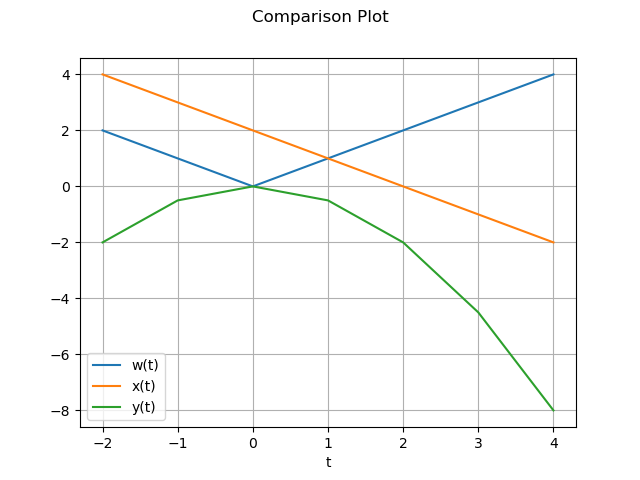

In [9]:
# Assignment 4

# Part A
# TODO: Code that solves A
t = np.arange(-2, 5)
fs = 5
w = np.abs(t)
x = 2 - t
y = -0.5 * t**2

# Part B
# TODO: Code that solves B

fig1 = plt.figure(1)

plt.plot(t, w, label='w(t)')
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.suptitle("Comparison Plot")
plt.legend()
plt.show()
plt.grid()

### Discussion

In order to change line style, we can add the attribute "linestyle" in our plot attributes to change the appearance of plot lines. For example, we can write "linestyle='-'" for dashed lines, and "linestyle=':'" for dotted lines.

## Assignment 5 -- Plotting Sound Files using Subplots


<IPython.core.display.Javascript object>


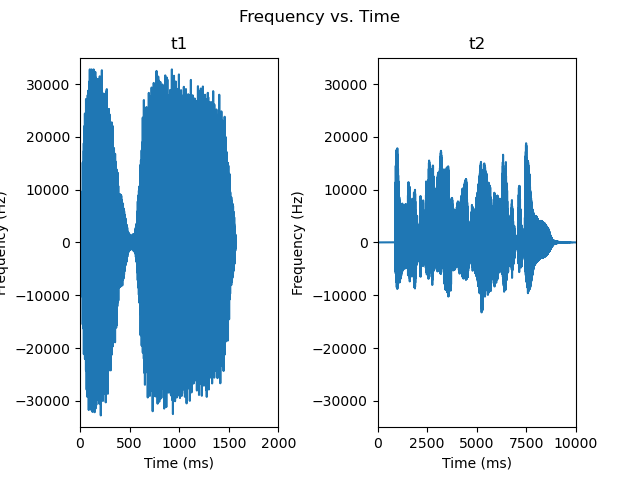

Text(0.5, 0, 'Time (ms)')

In [17]:
# Assignment 5 -- Plotting Sound Files using Subplots

# Part A
# TODO: Code that solves A
len1 = len(y1)
len2 = len(y2)
t1 = np.arange(0, len1, 1)
t1 = t1 / fs1 * 1000

t2 = np.arange(0, len2, 1)
t2 = t2 / fs2 * 1000

# Part B
# TODO: Code that solves B

data2 = y2[:,0]

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle('Frequency vs. Time')
plt.subplot(1,2,1)
plt.plot(t1, y1)
plt.title('t1')
plt.ylim(-35000,35000)
plt.xlim(0,2000)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (ms)')

plt.subplot(1,2,2)
plt.plot(t2, y2[:,0])
plt.title('t2')
plt.ylim(-35000,35000)
plt.xlim(0,10000)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (ms)')

### Discussion

The plot for t1 shows a higher sampling rate for the signal over shorter time, while the sampling rate for the signal t2 is shown as much lower over longer time. 